In [3]:
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gensim
from gensim.models import word2vec
import string
import re
random.seed(1)
np.random.seed(1)

In [4]:
os.chdir('C:/Users/torna/Documents/StatApp/StatApp')
#os.chdir('C:/Users/Kim Antunez/Documents/Projets_autres')
#os.chdir('/Users/alainquartierlatente/Desktop/Ensae/StatApp')
#os.chdir('/home/aqlt/Documents/Ensae/StatApp')

In [5]:
# On traite la mise en forme comme dans notre corpus
def mise_en_forme_phrase (phrase):
    phrase = phrase.lower()
    # On enlève la ponctuation + certaines apostrophes
    phrase = phrase.translate(str.maketrans('', '', string.punctuation + "'’«»—"))
    # On enlève les passages à la ligne
    phrase = re.sub('\\n', ' ', phrase)
    # On enlève les tabulations
    phrase = re.sub('\\t', ' ', phrase)
    # On enlève les espaces multiples et les espaces à la fin des phrases
    phrase = re.sub(' +', ' ', phrase)
    phrase = re.sub(' +$', '', phrase)
    phrase = re.sub('^ +', '', phrase)
    # phrase.isalpha() # inutile
    return(phrase)

In [23]:
def calcul_sentence_embedding(phrase,matrice,model1):
    if len(phrase)>0:
        sum1 = sum(matrice[mot] for mot in phrase if mot in model1.wv.index2word)
        #sum1 = sum(matrice_norm[mot] for mot in phrase if mot in model1.wv.index2word)
        sum2 = sum(matrice["lowfrequencyword"] for mot in phrase if mot not in model1.wv.index2word)
        #sum2 = sum(matrice_norm["lowfrequencyword"] for mot in phrase if mot not in model1.wv.index2word)
        return (sum1+sum2)/len(phrase)
    else:
        return matrice["lowfrequencyword"]

In [8]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm


In [9]:
liste_reg = {50:["reg_log_50","reg_log_st_50"],
             100:["reg_log_100","reg_log_st_100"],
             300:["reg_log_300","reg_log_st_300"]
            }
resultat = pd.DataFrame(columns=[''])

In [27]:
epoch=100
window=4
learning_rate=0.02
resultat = pd.DataFrame(columns=[''])

def creer_indice(noms):
    for dim in [50,100,300]:
        chemin1 = "data/ens/gensim/dim{}_ep{}_w{}_lr{}_seed1".format(dim, epoch, window, str(learning_rate)[2:]) 
        model1 = gensim.models.keyedvectors.KeyedVectors.load(chemin1 + "/word2vec.model")
        chemin2 = "data/ens/gensim/dim{}_ep{}_w{}_lr{}_seed5".format(dim, epoch, window, str(learning_rate)[2:])  
        model2 = gensim.models.keyedvectors.KeyedVectors.load(chemin2 + "/word2vec.model")
        chemin3 = "data/ens/gensim/dim{}_ep{}_w{}_lr{}_seed10".format(dim, epoch, window, str(learning_rate)[2:])  
        model3 = gensim.models.keyedvectors.KeyedVectors.load(chemin3 + "/word2vec.model")
        chemin4 = "data/ens/gensim/dim{}_ep{}_w{}_lr{}_seed15".format(dim, epoch, window, str(learning_rate)[2:])  
        model4 = gensim.models.keyedvectors.KeyedVectors.load(chemin4 + "/word2vec.model")
        chemin5 = "data/ens/gensim/dim{}_ep{}_w{}_lr{}_seed20".format(dim, epoch, window, str(learning_rate)[2:])  
        model5 = gensim.models.keyedvectors.KeyedVectors.load(chemin5 + "/word2vec.model")
        chemin6 = "data/ens/gensim/dim{}_ep{}_w{}_lr{}_seed25".format(dim, epoch, window, str(learning_rate)[2:]) 
        model6 = gensim.models.keyedvectors.KeyedVectors.load(chemin6 + "/word2vec.model")
        
        matrice = {word : (model1.wv[word]+model2.wv[word]+model3.wv[word]+model4.wv[word]+model5.wv[word]+model6.wv[word])/6
           for word in model1.wv.index2word}
        
        for regression in liste_reg[dim]:
            chemin = "data/sentimental_analysis/{}.file".format(regression)
            with open(chemin, "rb") as f:
                reg  = pickle.load(f)
            resultat[regression] = 0
            print(regression)
            for nom in noms:
                print(nom)
                df = pd.read_csv("data/sentimental_analysis/tweet_filtered_trim/" + nom +"-trim-agg.txt",sep="#//#/?&",header=None,engine='python',encoding='UTF-8')
                df.columns = ['tweet']
                phrases = [mise_en_forme_phrase(ligne.tweet).split() for ligne in df.itertuples()]
                phrases_emb = [calcul_sentence_embedding(phrase,matrice,model1) for phrase in phrases]
                Y = reg.predict(phrases_emb)
                Y_bis = [max(val,0) for val in Y]
                resultat.loc[nom[0:7],regression] = [np.mean(Y_bis)]

In [15]:
noms = []
for i in range(2011,2019):
    for j in range(1,13):
        if j < 10:
            mot = "0"+str(j)
        else:
            mot = str(j)
        noms.append(str(str(i)+"-"+mot+"-"+mot))

In [28]:
creer_indice(noms)

reg_log_50
2011-01-01
2011-02-02
2011-03-03
2011-04-04
2011-05-05
2011-06-06
2011-07-07
2011-08-08
2011-09-09
2011-10-10
2011-11-11
2011-12-12
2012-01-01
2012-02-02
2012-03-03
2012-04-04
2012-05-05
2012-06-06
2012-07-07
2012-08-08
2012-09-09
2012-10-10
2012-11-11
2012-12-12
2013-01-01
2013-02-02
2013-03-03
2013-04-04
2013-05-05
2013-06-06
2013-07-07
2013-08-08
2013-09-09
2013-10-10
2013-11-11
2013-12-12
2014-01-01
2014-02-02
2014-03-03
2014-04-04
2014-05-05
2014-06-06
2014-07-07
2014-08-08
2014-09-09
2014-10-10
2014-11-11
2014-12-12
2015-01-01
2015-02-02
2015-03-03
2015-04-04
2015-05-05
2015-06-06
2015-07-07
2015-08-08
2015-09-09
2015-10-10
2015-11-11
2015-12-12
2016-01-01
2016-02-02
2016-03-03
2016-04-04
2016-05-05
2016-06-06
2016-07-07
2016-08-08
2016-09-09
2016-10-10
2016-11-11
2016-12-12
2017-01-01
2017-02-02
2017-03-03
2017-04-04
2017-05-05
2017-06-06
2017-07-07
2017-08-08
2017-09-09
2017-10-10
2017-11-11
2017-12-12
2018-01-01
2018-02-02
2018-03-03
2018-04-04
2018-05-05
2018-06-06

In [29]:
with open("data/sentimental_analysis/index_tot.file", "wb") as f:
    pickle.dump(resultat, f, pickle.HIGHEST_PROTOCOL)

# Début : les indices ont été calculés

In [31]:
with open("data/sentimental_analysis/index_tot.file", "rb") as f:
    resultat = pickle.load(f)
del resultat['']

In [32]:
resultat

,reg_log_50,reg_log_st_50,reg_log_100,reg_log_st_100,reg_log_300,reg_log_st_300
2011-01,0.643603,0.611071,0.676378,0.660112,0.677592,0.587764
2011-02,0.647644,0.604662,0.681884,0.669743,0.675571,0.579165
2011-03,0.637997,0.599425,0.672736,0.660757,0.663632,0.572353
2011-04,0.643095,0.608810,0.684762,0.666190,0.679286,0.588333
2011-05,0.639286,0.605714,0.669524,0.653333,0.660476,0.561190
...,...,...,...,...,...,...
2018-08,0.503095,0.470714,0.578810,0.562381,0.567381,0.485238
2018-09,0.512619,0.485238,0.579048,0.569286,0.575714,0.481190
2018-10,0.510952,0.480714,0.582857,0.567143,0.570952,0.487381
2018-11,0.503571,0.479762,0.583810,0.575952,0.570000,0.478810


In [39]:
#np.savetxt('Sentiment_brut_modele.csv', resultat, fmt='%s', delimiter=';', newline='\n')
resultat.to_csv("Sentiment_brut_modele.csv",sep=";")

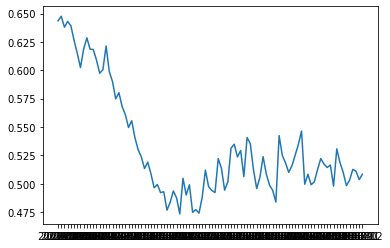

In [40]:
plt.plot(resultat['reg_log_50'])

In [42]:
resultat_norm = pd.DataFrame(columns=["reg_log_50","reg_log_st_50","reg_log_100","reg_log_st_100","reg_log_300","reg_log_st_300"])
for index, row in resultat.iterrows():
    resultat_norm.loc[index,'reg_log_50'] = round(100*resultat.loc[index,'reg_log_50'] / resultat.loc['2011-01','reg_log_50'])
    resultat_norm.loc[index,'reg_log_st_50'] = round(100*resultat.loc[index,'reg_log_st_50'] / resultat.loc['2011-01','reg_log_st_50'])
    resultat_norm.loc[index,'reg_log_100'] = round(100*resultat.loc[index,'reg_log_100'] / resultat.loc['2011-01','reg_log_100'])
    resultat_norm.loc[index,'reg_log_st_100'] = round(100*resultat.loc[index,'reg_log_st_100'] / resultat.loc['2011-01','reg_log_st_100'])
    resultat_norm.loc[index,'reg_log_300'] = round(100*resultat.loc[index,'reg_log_300'] / resultat.loc['2011-01','reg_log_300'])
    resultat_norm.loc[index,'reg_log_st_300'] = round(100*resultat.loc[index,'reg_log_st_300'] / resultat.loc['2011-01','reg_log_st_300'])

In [43]:
resultat_norm

,reg_log_50,reg_log_st_50,reg_log_100,reg_log_st_100,reg_log_300,reg_log_st_300
2011-01,100,100,100,100,100,100
2011-02,101,99,101,101,100,99
2011-03,99,98,99,100,98,97
2011-04,100,100,101,101,100,100
2011-05,99,99,99,99,97,95
...,...,...,...,...,...,...
2018-08,78,77,86,85,84,83
2018-09,80,79,86,86,85,82
2018-10,79,79,86,86,84,83
2018-11,78,79,86,87,84,81


In [44]:
index = pd.read_csv("data/sentimental_analysis/camme.csv",sep=';',header=0,engine='python',encoding='UTF-8')
index

,Date,Indice
0,2011-01,89
1,2011-02,89
2,2011-03,87
3,2011-04,86
4,2011-05,87
...,...,...
91,2018-08,96
92,2018-09,94
93,2018-10,94
94,2018-11,91


In [45]:
camme = pd.DataFrame(columns=['Indice'])

In [46]:
for i, row in index.iterrows():
    ind = index.loc[i,'Date']
    camme.loc[ind,'Indice'] = round(100*index.loc[i,'Indice'] / index.loc[0,'Indice'])

In [47]:
camme

,Indice
2011-01,100
2011-02,100
2011-03,98
2011-04,97
2011-05,98
...,...
2018-08,108
2018-09,106
2018-10,106
2018-11,102


In [48]:
x1 = resultat_norm['reg_log_50']
x2 = resultat_norm['reg_log_st_50']
x3 = resultat_norm['reg_log_100']
x4 = resultat_norm['reg_log_st_100']
x5 = resultat_norm['reg_log_300']
x6 = resultat_norm['reg_log_st_300']
z = camme['Indice']

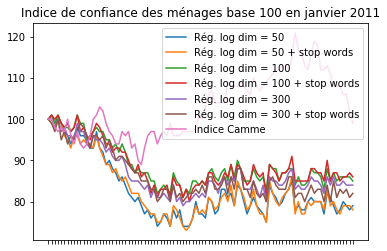

In [61]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.set_xticklabels([])  
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.plot(x4)
plt.plot(x5)
plt.plot(x6)
plt.plot(z)
plt.legend(["Rég. log dim = 50","Rég. log dim = 50 + stop words","Rég. log dim = 100","Rég. log dim = 100 + stop words",
            "Rég. log dim = 300","Rég. log dim = 300 + stop words","Indice Camme"])
plt.title("Indice de confiance des ménages base 100 en janvier 2011")
plt.show()

In [68]:
import cufflinks as cf
df_x1 = pd.DataFrame(x1)
df_x2 = pd.DataFrame(x2)
df_x3 = pd.DataFrame(x3)
df_x4 = pd.DataFrame(x4)
df_x5 = pd.DataFrame(x5)
df_x6 = pd.DataFrame(x6)
df_z = pd.DataFrame(z)
df_res = pd.concat([df_x1,df_x2,df_x3,df_x4,df_x5,df_x6,df_z],axis=1)

In [71]:
df_res.iplot(y=["reg_log_50","reg_log_st_50","reg_log_100","reg_log_st_100","reg_log_300","reg_log_st_300","Indice"],
             mode='lines+markers',asFigure=True)

In [72]:
res = pd.DataFrame(columns=["reg_log_50","reg_log_st_50","reg_log_100","reg_log_st_100",
                            "reg_log_300","reg_log_st_300",'Réalité'])
res['reg_log_50'] = x1
res['reg_log_st_50']=x2
res['reg_log_100']=x3
res['reg_log_st_100']=x4
res['reg_log_300']=x5
res['reg_log_st_300'] =x6              
res['Réalité'] = z

In [73]:
s2 = res.astype('int64', copy=False)

In [74]:
s2.corr()

,reg_log_50,reg_log_st_50,reg_log_100,reg_log_st_100,reg_log_300,reg_log_st_300,Réalité
reg_log_50,1.000000,0.990257,0.975978,0.974163,0.983369,0.952686,-0.268810
reg_log_st_50,0.990257,1.000000,0.977032,0.978688,0.977909,0.956838,-0.289542
reg_log_100,0.975978,0.977032,1.000000,0.981541,0.984038,0.974217,-0.339104
reg_log_st_100,0.974163,0.978688,0.981541,1.000000,0.978990,0.949253,-0.267213
reg_log_300,0.983369,0.977909,0.984038,0.978990,1.000000,0.964004,-0.271064
reg_log_st_300,0.952686,0.956838,0.974217,0.949253,0.964004,1.000000,-0.433099
Réalité,-0.268810,-0.289542,-0.339104,-0.267213,-0.271064,-0.433099,1.000000


# Série brute

In [75]:
index_brut = pd.read_csv("data/sentimental_analysis/camme_brut.csv",sep=';',header=0,engine='python',encoding='UTF-8')
index_brut

,Date,ind_synth_brut
0,2011-01,-1.047235
1,2011-02,-1.142324
2,2011-03,-1.353180
3,2011-04,-1.433358
4,2011-05,-1.230793
...,...,...
91,2018-08,-0.218250
92,2018-09,-0.617126
93,2018-10,-0.698157
94,2018-11,-1.052306


In [76]:
camme_brut = pd.DataFrame(columns=['Indice'])
for i, row in index_brut.iterrows():
    ind = index_brut.loc[i,'Date']
    camme_brut.loc[ind,'Indice'] = index_brut.loc[i,'ind_synth_brut'] 

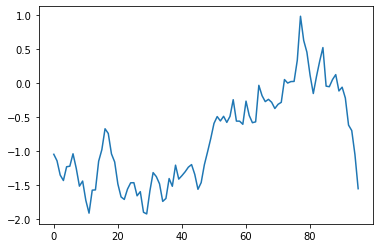

In [77]:
plt.plot(index_brut['ind_synth_brut'])

In [78]:
timeseries = camme_brut['Indice']

In [80]:
from sklearn.preprocessing import scale
camme_norm = scale(timeseries)
x1_scale = scale(resultat['reg_log_50'])
x2_scale = scale(resultat['reg_log_st_50'])
x3_scale = scale(resultat['reg_log_100'])
x4_scale = scale(resultat['reg_log_st_100'])
x5_scale = scale(resultat['reg_log_300'])
x6_scale = scale(resultat['reg_log_st_300'])

In [84]:
df_scale = pd.DataFrame({'reg_log_50':x1_scale,
                        'reg_log_st_50':x2_scale,
                        'reg_log_100':x3_scale,
                        'reg_log_st_100':x4_scale,
                        'reg_log_300':x5_scale,
                        'reg_log_st_300':x6_scale
                       })
df_scale

,reg_log_50,reg_log_st_50,reg_log_100,reg_log_st_100,reg_log_300,reg_log_st_300
0,2.350221,2.452329,2.103591,2.092163,2.396941,2.346540
1,2.435860,2.302493,2.255799,2.359045,2.343525,2.093595
2,2.231442,2.180030,2.002929,2.110048,2.027979,1.893226
3,2.339466,2.399459,2.335335,2.260612,2.441716,2.363286
4,2.258746,2.327086,1.914142,1.904329,1.944568,1.564898
...,...,...,...,...,...,...
91,-0.626989,-0.829485,-0.593276,-0.616043,-0.515996,-0.669189
92,-0.425189,-0.489889,-0.586695,-0.424706,-0.295741,-0.788247
93,-0.460504,-0.595665,-0.481397,-0.484086,-0.421601,-0.606158
94,-0.616899,-0.617934,-0.455072,-0.239966,-0.446773,-0.858281


In [85]:
#np.savetxt('Sentiment_norm_modele.csv', df_scale, fmt='%s', delimiter=';', newline='\n',header="Sentiment_norm")
df_scale.to_csv('Sentiment_norm_modele.csv',sep=";")

In [94]:
df_scale_evol = pd.DataFrame(columns=df_scale.columns)
for index, row in df_scale.iterrows():
    if index>0:
        df_scale_evol.loc[index,'reg_log_50'] = df_scale.loc[index,'reg_log_50'] / df_scale.loc[index-1,'reg_log_50']
        df_scale_evol.loc[index,'reg_log_st_50'] = df_scale.loc[index,'reg_log_st_50'] / df_scale.loc[index-1,'reg_log_st_50']
        df_scale_evol.loc[index,'reg_log_100'] = df_scale.loc[index,'reg_log_100'] / df_scale.loc[index-1,'reg_log_100']
        df_scale_evol.loc[index,'reg_log_st_100'] = df_scale.loc[index,'reg_log_st_100'] / df_scale.loc[index-1,'reg_log_st_100']
        df_scale_evol.loc[index,'reg_log_300'] = df_scale.loc[index,'reg_log_300'] / df_scale.loc[index-1,'reg_log_300']
        df_scale_evol.loc[index,'reg_log_st_300'] = df_scale.loc[index,'reg_log_st_300'] / df_scale.loc[index-1,'reg_log_st_300']

In [95]:
data_norm_evol = np.zeros(len(camme_norm)-1)
for i in range(len(camme_norm)-1):
    data_norm_evol[i] = (camme_norm[i+1]/camme_norm[i])

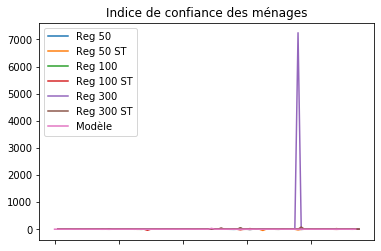

In [103]:
#### FAUX : attention aux chiffres négatifs !!!!

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xticklabels([])  
plt.plot(df_scale_evol['reg_log_50'])
plt.plot(df_scale_evol['reg_log_st_50'])
plt.plot(df_scale_evol['reg_log_100'])
plt.plot(df_scale_evol['reg_log_st_100'])
plt.plot(df_scale_evol['reg_log_300'])
plt.plot(df_scale_evol['reg_log_st_300'])
plt.plot(data_norm_evol)
plt.legend(["Reg 50","Reg 50 ST","Reg 100","Reg 100 ST","Reg 300","Reg 300 ST","Modèle"])
plt.title("Indice de confiance des ménages")
plt.show()

# Indice annuel

In [99]:
noms_bis = []
for i in range(2011,2019):
    for j in range(1,13):
        if j < 10:
            mot = "0"+str(j)
        else:
            mot = str(j)
        noms_bis.append(str(str(i)+"-"+mot))

In [131]:
df_scale_an = pd.DataFrame(columns=df_scale.columns)
for an in range(8):
    df_scale_an.loc[2011+an] = resultat.loc[noms_bis[an:12+an]].mean()    

In [132]:
df_scale_an = pd.DataFrame(columns=df_scale.columns)
for an in range(8):
    df_scale_an.loc[2011+an] = df_scale.loc[an:12+an].mean()    

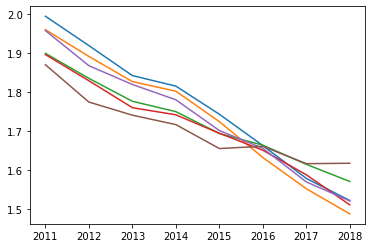

In [133]:
plt.plot(df_scale_an)

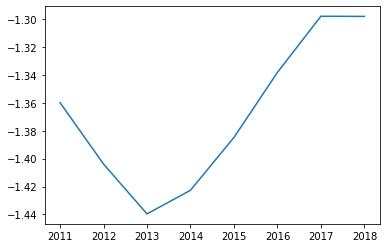

In [135]:
camme_an = pd.DataFrame(columns=['Indice'])
for an in range(8):
    camme_an.loc[2011+an] = camme_brut.loc[noms_bis[an:12+an]].mean()    
plt.plot(camme_an)